In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('global-shark-attack.csv', sep=';')

In [3]:
df.columns = [e.lower().replace(' ', '_') for e in df.columns]

In [4]:
df.rename(columns={'species_': 'species' ,
                       'case_number.1':'case_number_',
                       'fatal_(y/n)':'fatal',
                       'sex_':'sex'},inplace=True)

In [5]:
eliminar_columnas=["date","time","pdf","href_formula","href","case_number","case_number_","original_order",'investigator_or_source']
df =df.drop(columns=eliminar_columnas)

In [6]:

    df.age=df.age.dropna().apply(lambda x:x.replace(' ','_'))
    df.age=df.age.str.lower()
    df.injury=df.injury.dropna().apply(lambda x:x.replace(' ','_'))
    df.injury=df.injury.str.lower()
    df.fatal=df.fatal.dropna().apply(lambda x:x.replace(' ','_'))
    df.fatal=df.fatal.str.lower()
    df.species=df.species.dropna().apply(lambda x:x.replace(' ','_'))
    df.species=df.species.str.lower()
    df.location=df.location.dropna().apply(lambda x:x.replace(' ','_'))
    df.location=df.location.str.lower()
    df.area=df.area.dropna().apply(lambda x:x.replace(' ','_'))
    df.area=df.area.str.lower()
    df.country=df.country.dropna().apply(lambda x:x.replace(' ','_'))
    df.country=df.country.str.lower()
    df.sex=df.sex.dropna().apply(lambda x:x.replace(' ','_'))
    df.sex=df.sex.str.lower()
    df.name=df.name.dropna().apply(lambda x:x.replace(' ','_'))
    df.name=df.name.str.lower()
    df.type=df.type.dropna().apply(lambda x:x.replace(' ','_'))
    df.type=df.type.str.lower()
    df.activity=df.activity.dropna().apply(lambda x:x.replace(' ','_'))
    df.activity=df.activity.str.lower()

In [7]:
#Este codigo ordena fatal a valores de si y de no
fix_fatal={'y_x_2':'y','f':'y','nq':'y','2017.0':'n'}
df['fatal'] = df['fatal'].apply(lambda x: fix_fatal.get(str(x), x))


In [8]:
df['country'].fillna('Unknown', inplace=True)

mask = df['country'].str.contains('usa',na=False)
df.loc[mask, 'country'] = 'usa'

In [9]:
df_usa=df[(df['country']=='usa')]

In [10]:
mask = df['country'].str.contains('usa', case=False, na=False)
usa_rows = df[mask]
df= usa_rows

In [11]:
df['name'] = df['name'].fillna('unknown_name')
df = df.reset_index(drop=True)


In [12]:
fix_name={'female':'unknown','male':'uknown_name'}
df['name'] = df['name'].apply(lambda x: fix_name.get(str(x), x))

In [13]:
df['activity'] = df['activity'].fillna('unknown_activity')
df = df.reset_index(drop=True)

In [14]:
pd.set_option('display.max_rows', None)

In [15]:
# RENOMBRAR ACTIVIDAD

In [16]:
def rename_activity_1(activity):
    keywords = ['walking', 'swim', 'wading', 'float','standing','bathing','tread']
    if any(keyword in activity.lower() for keyword in keywords):
        return 'swimming'
    return activity

In [17]:
def rename_activity_2(activity):
    keywords = ['div', 'jumping', 'scub', 'feed','tow']
    if any(keyword in activity.lower() for keyword in keywords):
        return 'diving'
    return activity

In [18]:
def rename_activity_3(activity):
    keywords = ['fish', 'hunt', 'tag','net','spear','play']
    if any(keyword in activity.lower() for keyword in keywords):
        return 'fishing'
    return activity

In [19]:
def rename_activity_4(activity):
    keywords = ['board']
    if any(keyword in activity.lower() for keyword in keywords):
        return 'boarding'
    return activity

In [20]:
def rename_activity_5(activity):
    keywords = ['boat','disas']
    if any(keyword in activity.lower() for keyword in keywords):
        return 'boat_accident'
    return activity

In [21]:
def rename_activity_6(activity):
    keywords = ['surf','paddle','waves']
    if any(keyword in activity.lower() for keyword in keywords):
        return 'surf'
    return activity

In [22]:
df['activity'] = df['activity'].apply(rename_activity_1)
df['activity'] = df['activity'].apply(rename_activity_3)
df['activity'] = df['activity'].apply(rename_activity_2)
df['activity'] = df['activity'].apply(rename_activity_4)
df['activity'] = df['activity'].apply(rename_activity_5)
df['activity'] = df['activity'].apply(rename_activity_6)

In [23]:
values_to_keep = df['activity'].value_counts()[df['activity'].value_counts() >= 9].index
df = df[df['activity'].isin(values_to_keep)]    

In [24]:
sex_dict={"f":"Female","m":"Male","m_x_2":"Male", "lli":"Female"}
df.sex=df.sex.apply(lambda x : sex_dict.get(x,x))
df.sex=df.sex.fillna("Uknown_sex")

In [25]:
#Ahora trabajamos lo mismo en injury para normalizarlo

In [26]:
df.injury=df.injury.fillna('unknown_injury')

In [27]:
def rename_injury_1(injury):
    keywords = ['bit',]
    if any(keyword in injury for keyword in keywords):
        return 'bitten'
    return injury

In [28]:
def rename_injury_2(injury):
    keywords = ['lac','bru']
    if any(keyword in injury for keyword in keywords):
        return 'lacerations'
    return injury

In [29]:
def rename_injury_3(injury):
    keywords = ['no_injury','injury_no','uninjured','minor','surv','survived','details']
    if any(keyword in injury for keyword in keywords):
        return 'unscathed'
    return injury

In [30]:
def rename_injury_4(injury):
    keywords = ['injur']
    if any(keyword in injury for keyword in keywords):
        return 'small_injuries'
    return injury

In [31]:
def rename_injury_5(injury):
    keywords = ['pun']
    if any(keyword in injury for keyword in keywords):
        return 'punctures'
    return injury

In [32]:
def rename_injury_6(injury):
    keywords = ['dea','fat']
    if any(keyword in injury for keyword in keywords):
        return 'fatal'
    return injury

In [33]:
df['injury'] = df['injury'].apply(rename_injury_1)
df['injury'] = df['injury'].apply(rename_injury_2)
df['injury'] = df['injury'].apply(rename_injury_3)
df['injury'] = df['injury'].apply(rename_injury_4)
df['injury'] = df['injury'].apply(rename_injury_5)
df['injury'] = df['injury'].apply(rename_injury_6)

In [108]:
values_to_keep_5 = df['injury'].value_counts()[df['injury'].value_counts() >= 5].index
df = df[df['injury'].isin(values_to_keep_5)]    

In [112]:
df.injury.value_counts()

injury
bitten            561
lacerations       549
unscathed         156
punctures          92
small_injuries     86
fatal              59
Name: count, dtype: int64

In [114]:
df['species'].fillna('unknown shark', inplace=True)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1503 entries, 0 to 2515
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      1502 non-null   float64
 1   type      1497 non-null   object 
 2   country   1503 non-null   object 
 3   area      1502 non-null   object 
 4   location  1489 non-null   object 
 5   activity  1503 non-null   object 
 6   name      1503 non-null   object 
 7   sex       1503 non-null   object 
 8   age       1503 non-null   float64
 9   injury    1503 non-null   object 
 10  fatal     1503 non-null   object 
 11  species   1503 non-null   object 
dtypes: float64(2), object(10)
memory usage: 152.6+ KB


In [118]:
df.species=df.species.str.replace("_"," ")
df.species=df.species.str.lower()


In [120]:
def categorizar_especie_principal(species, palabra_clave, categoria_principal):
    if palabra_clave in species:
        return categoria_principal
    else:
        return species

In [121]:
df['species'] = df['species'].apply(categorizar_especie_principal, palabra_clave='white', categoria_principal='White shark')
df['species'] = df['species'].apply(categorizar_especie_principal, palabra_clave='tiger', categoria_principal='Tiger shark')
df['species'] = df['species'].apply(categorizar_especie_principal, palabra_clave='bull', categoria_principal='Bull shark')
df['species'] = df['species'].apply(categorizar_especie_principal, palabra_clave='wobbegong', categoria_principal='Wobbegong shark')
df['species'] = df['species'].apply(categorizar_especie_principal, palabra_clave='blacktip', categoria_principal='Blacktip shark')
df['species'] = df['species'].apply(categorizar_especie_principal, palabra_clave='mako', categoria_principal='Mako shark')
df['species'] = df['species'].apply(categorizar_especie_principal, palabra_clave='raggedtooth', categoria_principal='Raggedtooth shark')
df['species'] = df['species'].apply(categorizar_especie_principal, palabra_clave='bronze whaler', categoria_principal='Bronze whaler shark')
df['species'] = df['species'].apply(categorizar_especie_principal, palabra_clave='lemon', categoria_principal='Lemon shark')
df['species'] = df['species'].apply(categorizar_especie_principal, palabra_clave='oceanic whitetip', categoria_principal='Oceanic whitetip shark')
df['species'] = df['species'].apply(categorizar_especie_principal, palabra_clave='sandtiger', categoria_principal='Sandtiger shark')
df['species'] = df['species'].apply(categorizar_especie_principal, palabra_clave='zambesi', categoria_principal='Zambesi shark')
df['species'] = df['species'].apply(categorizar_especie_principal, palabra_clave='hammerhead', categoria_principal='Hammerhead shark')
df['species'] = df['species'].apply(categorizar_especie_principal, palabra_clave='spinner', categoria_principal='Spinner shark')
df['species'] = df['species'].apply(categorizar_especie_principal, palabra_clave='basking', categoria_principal='Basking shark')
df['species'] = df['species'].apply(categorizar_especie_principal, palabra_clave='sevengill', categoria_principal='Sevengill shark')
df['species'] = df['species'].apply(categorizar_especie_principal, palabra_clave='angel', categoria_principal='Angel shark')
df['species'] = df['species'].apply(categorizar_especie_principal, palabra_clave='grey', categoria_principal='Grey reef shark')
df['species'] = df['species'].apply(categorizar_especie_principal, palabra_clave='caribbean', categoria_principal='Caribbean reef shark')
df['species'] = df['species'].apply(categorizar_especie_principal, palabra_clave='galapagos', categoria_principal='Galapagos shark')
df['species'] = df['species'].apply(categorizar_especie_principal, palabra_clave='cookiecutter', categoria_principal='Cookiecutter shark')
df['species'] = df['species'].apply(categorizar_especie_principal, palabra_clave='bull', categoria_principal='bull shark')
df['species'] = df['species'].apply(categorizar_especie_principal, palabra_clave='nurse', categoria_principal='Nurse shark')
df['species'] = df['species'].apply(categorizar_especie_principal, palabra_clave='blue', categoria_principal='Blue shark')
df['species'] = df['species'].apply(categorizar_especie_principal, palabra_clave='sand', categoria_principal='Sand shark')
df['species'] = df['species'].apply(categorizar_especie_principal, palabra_clave='dusky', categoria_principal='Dusky shark')

In [124]:
def rename_age_1(age):
    keywords = ['tee','ch','s']
    if any(keyword in age for keyword in keywords):
        return '15'
    return age

In [126]:
values_to_keep_2= df['age'].value_counts()[df['age'].value_counts() > 2].index
df = df[df['age'].isin(values_to_keep_2)] 

In [128]:
df['age'] = df['age'].apply(rename_age_1)

TypeError: argument of type 'float' is not iterable

In [133]:
split_data_age = df.age.astype(float)

In [135]:
df.age = df.age.astype(float)

In [137]:
df.head()

,year,type,country,area,location,activity,name,sex,age,injury,fatal,species
0,2023.0,unprovoked,usa,new_york,"beach_3,_robert_moses_state_park,_suffolk_county",swimming,unknown,Female,15.0,punctures,n,Tiger shark
1,2022.0,unprovoked,usa,florida,"daytona_beach_shores,_volusia_county",unknown_activity,tasa_summers,Female,40.0,lacerations,n,a small shark
2,2022.0,unprovoked,usa,florida,"anna_maria_island,_manatee_county",surf,erika_lane,Female,42.0,punctures,n,Blacktip shark
3,2021.0,unprovoked,usa,florida,"bathtub_beach,_martin_county",fishing,amiya_lobb-smith,Female,9.0,bitten,n,Spinner shark
4,2019.0,unprovoked,usa,florida,"jacksonville_beach,_duval_county",unknown_activity,uknown_name,Male,25.0,unscathed,n,unknown shark


In [174]:
df_new_1=df.groupby(["area","activity","injury","species"]).agg({"age":"mean"})

In [177]:
df_ataques=df_nsw_1.round()

In [179]:
table=pd.DataFrame(table)

In [190]:
df_ataques.head()

age
area    activity injury      species             
alabama boarding fatal       unknown shark   23.0
        fishing  bitten      Bull shark      43.0
        swimming bitten      unknown shark   24.0
                 lacerations 4' to 5' shark   7.0
                             Blacktip shark  14.0

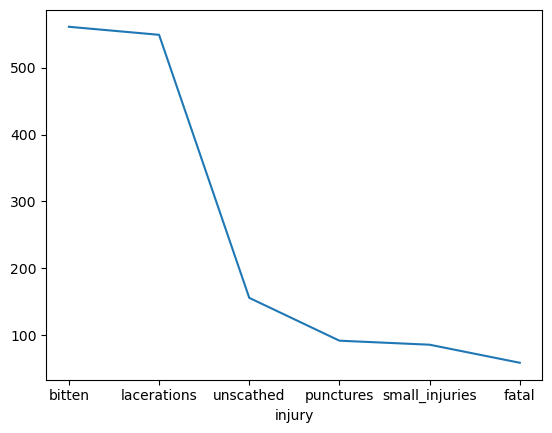

In [188]:
df_plot=df.injury.value_counts().plot()

In [196]:
df_plot2=df.groupby(["area"])["injury"].value_counts()